In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import csv
import random as rnd
import math
import seaborn as sn

In [3]:
def assign(data):
    L = len(data[0])
    at = np.zeros((L, len(data)))
    for i in range(L):
        for j in range(len(data)):
            at[i][j] = ord(data[j][i])
    temp_int_num = []
    temp_int = []
    for i in range(len(at)):
        temp_int_num.append(len(list(set(at[i]))))
        temp_int.append(list(set(at[i])))
    for i in range(len(at)):
        for j in range(len(at[0])):
            cnt = 0
            for k in range(temp_int_num[i]):
                if at[i][j] == temp_int[i][k]:
                    if at[i][j] != ord('?'):
                        at[i][j] = cnt
                    else:
                        at[i][j] = -1
                cnt = cnt+1
    new_data = np.zeros((len(data), L))
    for i in range(len(data)):
        for j in range(L):
            new_data[i][j] = at[j][i]
    labels = at[0]
    return new_data, labels

In [35]:
def seperatebyclass(dataset,labels):
    seperate={}
    for i in range(len(dataset)):
        vector = dataset[i]
        classes = labels[i]
        if(classes not in seperate):
            seperate[classes] =[]
        seperate[classes].append(vector)
    return seperate

#calculating mean
def mean(numbers):
    return sum(numbers)/float(len(numbers))

#standard deviation
def stdev(numbers):
    avg = mean(numbers)
    variance = sum([pow(x - avg,2) for x in numbers])/float(len(numbers)+1)
    return math.sqrt(variance)

#summarize the dataset
def summar(dataset):
    summaries = [(mean(attribute), stdev(attribute)) for attribute in zip(*dataset)]
    return summaries

# summarize the attribute by class
def summar_att(dataset,labels):
    seperated = seperatebyclass(dataset,labels)
    summaries = {}
    for classval,instances in seperated.items():
        summaries[classval] = summar(instances)
    return summaries

#calculate the Gaussian prob. 
def cal_prob(X,mean,std):
    exponential = math.exp(-(math.pow(X-mean, 2)/(2 * math.pow(std,2) + 0.001)))
    return (1/(math.sqrt(2*math.pi)*std+0.001)) * exponential

#calculate class prob.
def cal_cls_prob(summaries,inputvector):
    prob={}
    for classval, classsum in summaries.items():
        prob[classval]=1
        for i in range(len(classsum)):
            mean, std = classsum[i]
            x = inputvector[i]
            prob[classval] *= cal_prob(x,mean,std)
    return prob

#prediction functions
def prediction(summaries,inputvector):
    prob = cal_cls_prob(summaries,inputvector)
    bestlabel,bestprob = None,-1
    for classval,probability in prob.items():
        if bestlabel is None or probability > bestprob:
            bestprob = probability
            bestlabel = classval
    return bestlabel

def pred(summaries, testset):
    predictions=[]
    for i in range(len(testset)):
        result = prediction(summaries,testset[i])
        predictions.append(result)
    return predictions

#calculating accuracy
def accuracy(testlabel,predictions):
    correct = 0
    for x in range(len(testlabel)):
        if (testlabel[x] == predictions[x]):
            correct = correct+1
    return(correct/float(len(testlabel)))

In [21]:
#reading datasets    
Mushroom_Train = pd.read_csv('Mushroom_Train.csv').values
Mushroom_Test = pd.read_csv('Mushroom_Test.csv').values
Mushroom_Train , Train_Labels = assign(Mushroom_Train)
Mushroom_Test , Test_Labels = assign(Mushroom_Test)

summaries = summar_att(Mushroom_Train, Train_Labels)
predicts = pred(summaries, Mushroom_Test)
acc = accuracy(Test_Labels, predicts)
print(f"Accuracy = {acc * 100} %")

Accuracy = 100.0 %


In [28]:
L, counts = np.unique(Train_Labels, return_counts=True)
counts

array([3641, 3959], dtype=int64)

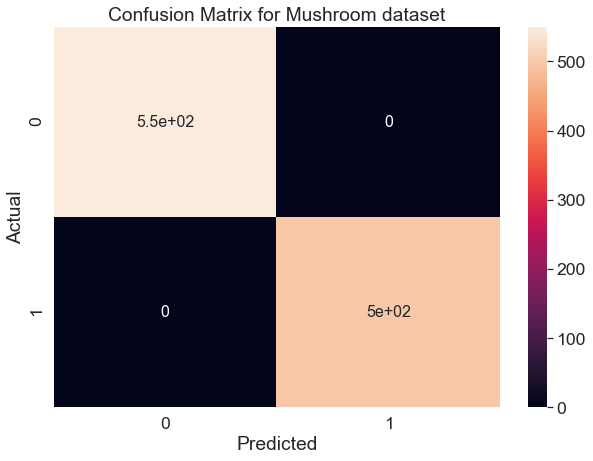

In [36]:
#Confusion matrix
L, counts = np.unique(Test_Labels, return_counts=True)
s = len(L)
confusion = [[0 for i in range(s)] for j in range(s)]

for i in range(len(Test_Labels)):
    for j in range(s):
        confusion[int(Test_Labels[i])][int(predicts[i])] += 1
    

df_cm = pd.DataFrame(confusion, range(s), range(s))
plt.figure(figsize = (10,7))
sn.set(font_scale = 1.6)#for label size
sn.heatmap(df_cm, annot=True,annot_kws={"size": 16})# font size
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Mushroom dataset')
plt.show()